<a href="https://colab.research.google.com/github/StephRoos/Kaggle_Survey/blob/main/2021_Kaggle_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploratory Data Analysis

In [87]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/StephRoos/Kaggle_Survey/main/kaggle_survey_2021_responses.csv')
df_q = df.iloc[0, :].T
df_a = df.iloc[1:, :]

In [4]:
df_a.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Age Distribution of Kagglers

In [5]:
# Create a table with age distribution by gender

df_age_gender = df_a[['Q1', 'Q2']].value_counts().reset_index()
df_age_gender.columns = ['Age', 'Gender', 'Counts']
df_age_gender = df_age_gender[df_age_gender['Gender'].isin(['Man', 'Woman'])]
df_age_gender = pd.pivot(data=df_age_gender, index='Age', columns='Gender', values='Counts')

In [6]:
df_age_gender

Gender,Man,Woman
Age,,
18-21,3696,1117
22-24,3643,963
25-29,3859,994
30-34,2765,618
35-39,1993,455
40-44,1537,317
45-49,1171,175
50-54,811,136
55-59,509,72


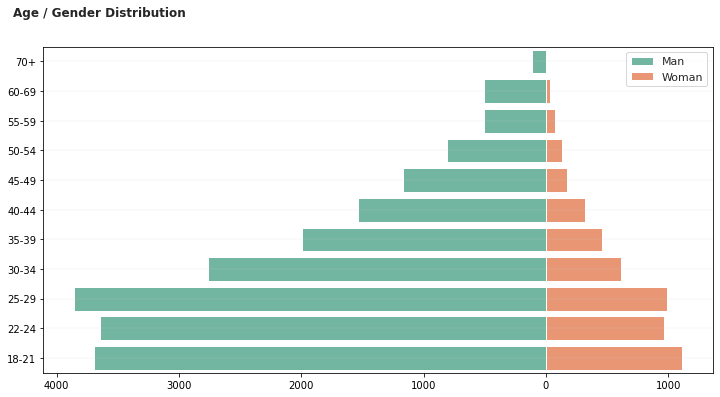

In [7]:
# Sort by age
data = df_age_gender.copy()
data.sort_index(ascending=False, inplace=True)
data['Man'] = -data['Man']

# Create a Pyramid plot with Age/Gender distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Man'], y=data.index, color='C0', label='Man')
sns.barplot(x=data['Woman'], y=data.index, color='C1', label='Woman')

ax.set_xlabel('')
ax.set_xticklabels(abs(ax.get_xticks().astype(int)))
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Age / Gender Distribution', fontsize=12, fontweight='bold')   

ax.legend()
plt.show()


In 2021 Kaggle's users are dominantly by man (79.3%), and woman (18.8%).

## Kagglers around the globe

In [75]:
# Create a table with number of Kagglers by country

df_countries = pd.DataFrame(df_a.groupby('Q3', dropna = False).size())
df_countries.index.name = 'Country'
df_countries.columns = ['Kagglers']
df_countries.sort_values(by='Kagglers', ascending=False, inplace=True)
df_countries = np.round(df_countries / df_countries.sum() *100, 1)
df_countries.rename(index={'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
df_countries.head(10)

,Kagglers
Country,
India,28.6
USA,10.2
Other,4.9
Japan,3.5
China,3.1
Brazil,2.9
Russia,2.9
Nigeria,2.7
UK,2.1


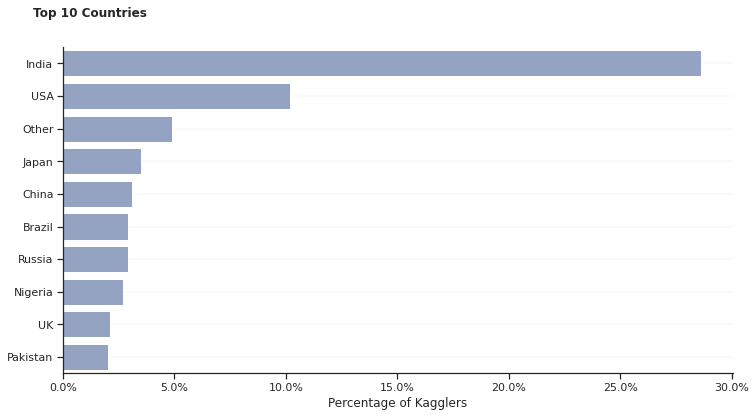

In [91]:
data = df_countries.copy()
data = data[0:10]

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Kagglers'], y=data.index, color='C2')

ax.set_xlabel('Percentage of Kagglers')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Top 10 Countries', fontsize=12, fontweight='bold')

plt.show()

India is obviously the number one country of Kagglers (28.6%). Second position is the USA (10.2%) with a big gap almost 20%, then another big gap to the 3rd place filled by users from Japan, China, Brazil, Russia and Nigeria with about the same percentage around 3%.

## Education Qualification of Kagglers

In [96]:
# Create a table with number of Kagglers by country

df_education = pd.DataFrame(df_a.groupby('Q4', dropna = False).size())
df_education.index.name = 'Education'
df_education.columns = ['Kagglers']
df_education.sort_values(by='Kagglers', ascending=False, inplace=True)
df_education = np.round(df_education/ df_education.sum() *100, 1)
df_education.rename(index={'Some college/university study without earning a bachelor’s degree': 'Some college', 'No formal education past high school':'High school'}, inplace=True)
df_education

,Kagglers
Education,
Master’s degree,39.0
Bachelor’s degree,38.1
Doctoral degree,10.8
Some college,6.7
I prefer not to answer,2.4
High school,1.6
Professional doctorate,1.4


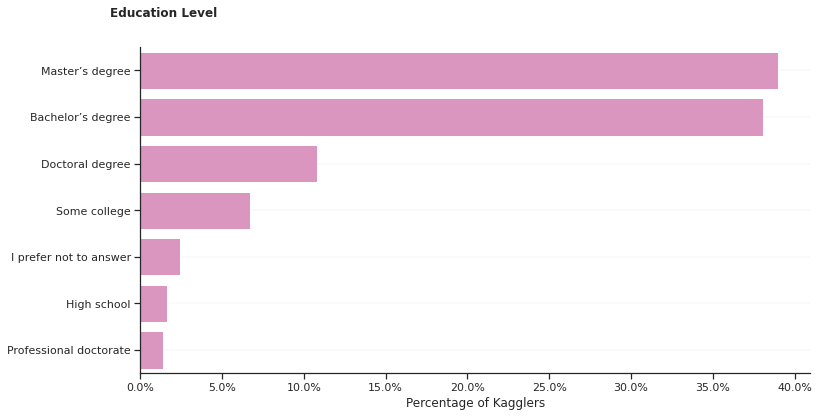

In [98]:
data = df_education.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Kagglers'], y=data.index, color='C3')

ax.set_xlabel('Percentage of Kagglers')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Education Level', fontsize=12, fontweight='bold')

plt.show()

More than 77.1% of Kagglers have master's and bachelor's degree, 12.2% have doctoral degree, 1.4% professional doctorate, 8.3% does not have a formal degree, and 1.6% has high school education.

## Current Role of Kagglers